<a href="https://colab.research.google.com/github/Beatricesalmeida/IA025_2022S1/blob/main/Exercicio_aula4_plot_otimo_batch_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nome: Beatrice Silva de Almeida

In [1]:
import numpy as np
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

from torchvision import transforms

from sklearn.datasets import load_iris
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_data = data[:,0:1]
target = data[:,1:2]
n_samples = x_data.shape[0]

print('dimensões de x_data:', x_data.shape)
print('dimensões de target:', target.shape)

dimensões de x_data: (50, 1)
dimensões de target: (50, 1)


In [3]:
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(target)
xt_min = x_train.min()
xt_max = x_train.max()
x_train_n = (x_train - xt_min)/(xt_max - xt_min)

yt_min = y_train.min()
yt_max = y_train.max()
y_train_n = (y_train - yt_min)/(yt_max - yt_min)

In [4]:
x_train_bias = torch.cat([torch.ones(size=(n_samples,1)), x_train_n], dim=1)
print(x_train_bias.shape)

torch.Size([50, 2])


In [5]:
dataset = TensorDataset(x_train_bias, y_train_n)

In [6]:

data_loader = DataLoader(dataset, 
                         batch_size=10, # tamanho do mini-batch de dados
                         shuffle=True) # se for True, embaralha os dados no inicio de cada iteração

Solução ótima

In [7]:
x_bias, y = next(iter(data_loader))

In [8]:
w_opt = (torch.inverse(x_bias.t().mm(x_bias)).mm(x_bias.t())).mm(y)
print(w_opt.t(), w_opt.shape)

tensor([[0.3801, 0.3898]]) torch.Size([2, 1])


# Exercício é codificar a próxima célula:

In [25]:
#Criando uma lista para os vetores otimos
otm = []

for i in range(100):
  for x_train, y_train in data_loader:
    x_tx = torch.inverse(torch.matmul(x_train.t(), x_train))
    x_txt = torch.matmul(x_tx, x_train.t())
    otimo = torch.matmul(x_txt, y_train)
    otm.append(otimo.t())
otm = torch.cat(otm,0)


#ajudada pelo código da Beatriz celante

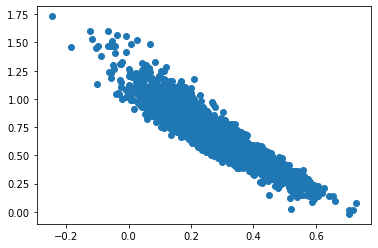

In [24]:
#w_opt = torch.cat(otm)
plt.scatter(otm[:,0], otm[:,1])